<a href="https://colab.research.google.com/github/andrinau/andrinau/blob/main/tugaskompstat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
sns.set(style="ticks", color_codes=True)
pd.set_option("display.max_colwidth", 200)

"Done"

'Done'

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Load data from list to datafame for further processing.
documents = pd.DataFrame({'documents':documents})
documents

,documents
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will be speaking tonight \n(Wednesday, 7:30 pm) on the messy subject of politics in Israel.\nHe is speaking at Hillel on the U.C. Berkeley campus. The tal..."
11310,\n
11311,\nI agree. Home runs off Clemens are always memorable. Kinda like\neclipses and hurricanes. They don't happen very often.
11312,"I used HP DeskJet with Orange Micros Grappler LS on System6.0.5.\n\nBut now I update system 6.0.5 to System7 with Kanji-Talk 7.1,\nthen I can not print by my DeskJet.\n\nIs the Grappler LS old ?\n..."


In [ ]:
documents[:10]

,documents
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."
5,"\n \nI read somewhere, I think in Morton Smith's _Jesus the Magician_, that\nold Lazarus wasn't dead, but going in the tomb was part of an initiation\nrite for a magi-cult, of which Jesus was als..."
6,\nOk. I have a record that shows a IIsi with and without a 64KB cache.\nIt's small enough that I will attach it.\n\nI have also measured some real programs with and without the 64 KB\ncache. The...
7,\n\n\nSounds like wishful guessing.\n\n\n\n\n'So-called' ? What do you mean ? How would you see the peace process?\n\nSo you say palestineans do not negociate because of 'well-founded' predictions...
8,Nobody is saying that you shouldn't be allowed to use msg. Just\ndon't force it on others. If you have food that you want to \nenhance with msg just put the MSG on the table like salt. It is\nt...
9,"\n I was wondering if anyone can shed any light on just how it is that these\nelectronic odometers remember the total elapsed mileage? What kind of\nmemory is stable/reliable enough, non-volatil..."


In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Removing everything except alphabets (i.e. the punctuations, numbers, and special characters) 
# and will replace them with blank space
documents['clean_doc'] = documents['documents'].str.replace("[^a-zA-Z#]", " ")

# removing short words because they usually don’t contain useful information
documents['clean_doc'] = documents['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase to nullify case sensitivity.
documents['clean_doc'] = documents['clean_doc'].apply(lambda x: x.lower())

In [ ]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
token_doc = documents["clean_doc"].apply(lambda x: x.split())

# remove stop-words
token_doc = token_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detoken_doc = []
for i in range(len(documents)):
    t = ' '.join(token_doc[i])
    detoken_doc.append(t)

documents['clean_doc'] = detoken_doc

In [ ]:
from os import X_OK
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
binary = False,
lowercase = True,
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(documents['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
print(str(vectorizer.vocabulary_)[:100])

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 


In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
terms

['ability',
 'able',
 'accept',
 'access',
 'according',
 'account',
 'action',
 'actions',
 'actual',
 'actually',
 'added',
 'addition',
 'additional',
 'address',
 'administration',
 'advance',
 'advice',
 'agencies',
 'agree',
 'algorithm',
 'allow',
 'allowed',
 'allows',
 'amendment',
 'america',
 'american',
 'americans',
 'analysis',
 'angeles',
 'anonymous',
 'answer',
 'answers',
 'anti',
 'anybody',
 'apparently',
 'appear',
 'appears',
 'apple',
 'application',
 'applications',
 'apply',
 'appreciate',
 'appreciated',
 'approach',
 'appropriate',
 'april',
 'arab',
 'archive',
 'area',
 'areas',
 'aren',
 'argument',
 'arguments',
 'armenia',
 'armenian',
 'armenians',
 'arms',
 'army',
 'article',
 'articles',
 'asked',
 'asking',
 'assume',
 'assuming',
 'atheism',
 'atheists',
 'attack',
 'attempt',
 'author',
 'authority',
 'available',
 'average',
 'avoid',
 'away',
 'background',
 'base',
 'baseball',
 'based',
 'basic',
 'basically',
 'basis',
 'begin',
 'beginning',

In [ ]:
vectorizer.fit_transform(terms)

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
print(str(vectorizer.vocabulary_))

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

In [ ]:
from sklearn.manifold import TSNE
A_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(A_topics)
embedding.shape

(11314, 2)

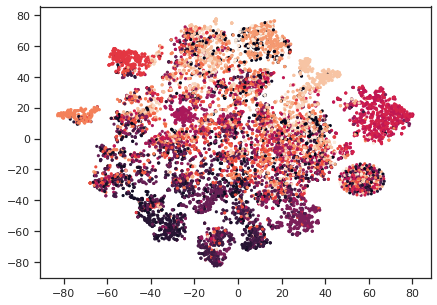

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()